# Introduction

## (i) Problem Statement
We have found that the 55+ age demographic has significantly less revenue than the other age demographics for health-related products based on our transaction data for the year 2017. The CEO should be interested in this problem because there's a growth potential for this particular demographic of 55+.

## (ii) Methodology
We imported data from transactions, demographics and products data sources. We did Exploratory Data Analysis (EDA) on these DataFrames to check if data wrangling and data cleansing are required. After the EDA, we identified the primary keys and foreign keys on these tables in order to merge. We then checked for the null values to make sure the primary keys and foreign keys do not have any null values. Afterwards, we merge these 3 tables together as tran_demo_prod. 

We then located the columns 'age', 'product_category', and 'sales_value' to be essential to find the total sales for health-related products for the demographics 55+. We checked for the null values on these 3 columns and found there were no null values. We also checked for outliers and we decided to include the outliers in our analysis.

We calculated the total sales by using the sum function and then plotted our findings in 3 different bar charts.

## (iii) Proposed Solution
In order to help the Regork CEO increase the top line, it is our recommendation that we do targeted advertising to this demographic to increase Sales. 

This is a demographic that requires these products, so it is evident they are not buying at our stores. 

We need to provide coupons or offer a Senior Citizen discount to drive an increase in this demographic. 

In [57]:
pip install completejourney-py

Note: you may need to restart the kernel to use updated packages.


## Packages required
- Complete Journey Package - Data Source (imported transactions, demographics, products)
- Pandas for data analysis and manupilation (merge, group by)
- Matplotlib for plotting bar chart and box plot
- Warnings to suppress any warning messages

In [58]:
# Import libraries
from completejourney_py import get_data
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [59]:
# Importing demographics data
demographics = get_data()['demographics']
demographics

,household_id,age,income,home_ownership,marital_status,household_size,household_comp,kids_count
0,1,65+,35-49K,Homeowner,Married,2,2 Adults No Kids,0
1,1001,45-54,50-74K,Homeowner,Unmarried,1,1 Adult No Kids,0
2,1003,35-44,25-34K,None,Unmarried,1,1 Adult No Kids,0
3,1004,25-34,15-24K,None,Unmarried,1,1 Adult No Kids,0
4,101,45-54,Under 15K,Homeowner,Married,4,2 Adults Kids,2
...,...,...,...,...,...,...,...,...
796,986,25-34,35-49K,None,Unmarried,1,1 Adult No Kids,0
797,992,45-54,35-49K,Homeowner,Married,3,2 Adults Kids,1
798,993,55-64,50-74K,Homeowner,Married,5+,1 Adult Kids,3+
799,996,55-64,25-34K,Homeowner,Married,2,2 Adults No Kids,0


In [60]:
# Importing products data
products = get_data()['products']
products

,product_id,manufacturer_id,department,brand,product_category,product_type,package_size
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISCELLANEOUS,National,None,None,None
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,None
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
...,...,...,...,...,...,...,...
92326,18293142,6384,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,None
92327,18293439,6393,DRUG GM,National,BOOKSTORE,CHILDRENS LOW END,None
92328,18293696,6406,DRUG GM,National,BOOKSTORE,PAPERBACK BEST SELLER,None
92329,18294080,6442,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,None


In [61]:
# Importing transactions data
transactions = get_data()['transactions']
transactions

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,transaction_timestamp
0,900,330,31198570044,1095275,1,0.50,0.00,0.0,0.0,1,2017-01-01 11:53:26
1,900,330,31198570047,9878513,1,0.99,0.10,0.0,0.0,1,2017-01-01 12:10:28
2,1228,406,31198655051,1041453,1,1.43,0.15,0.0,0.0,1,2017-01-01 12:26:30
3,906,319,31198705046,1020156,1,1.50,0.29,0.0,0.0,1,2017-01-01 12:30:27
4,906,319,31198705046,1053875,2,2.78,0.80,0.0,0.0,1,2017-01-01 12:30:27
...,...,...,...,...,...,...,...,...,...,...,...
1469302,679,447,41453103606,14025548,1,0.79,0.20,0.0,0.0,53,2018-01-01 03:50:03
1469303,2070,311,41453083334,909894,1,1.73,0.17,0.0,0.0,53,2018-01-01 04:01:20
1469304,2070,311,41453083334,933067,2,5.00,2.98,0.0,0.0,53,2018-01-01 04:01:20
1469305,2070,311,41453083334,1029743,1,2.60,0.29,0.0,0.0,53,2018-01-01 04:01:20


In [62]:
# Check for null values under primary key household_id to ensure we can use this column to join
print(demographics['household_id'].isnull().sum())

0


In [63]:
# Check for null values under primary key product_id in products table and foreign key in transactions table to ensure we can use this column to join
print(products['product_id'].isnull().sum())

0


In [64]:
# Check for null values under foreign key household_id in transactions table and foreign key product_id in transactions table to ensure we can use this column to join
print(transactions[['product_id','household_id']].isnull().sum())

product_id      0
household_id    0
dtype: int64


In [65]:
# Check for null values for sales_value, age, and product_category columns before we calculate the total sales for the product categories of organic fruits and vegetables, health/wellness and vitamins across all age groups
print(transactions['sales_value'].isnull().sum())
print(demographics['age'].isnull().sum())

0
0


In [66]:
# Left join the transactions table with demographics table on household_id
tran_demo = transactions.merge(demographics,on='household_id',how='left')
tran_demo

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,transaction_timestamp,age,income,home_ownership,marital_status,household_size,household_comp,kids_count
0,900,330,31198570044,1095275,1,0.50,0.00,0.0,0.0,1,2017-01-01 11:53:26,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0
1,900,330,31198570047,9878513,1,0.99,0.10,0.0,0.0,1,2017-01-01 12:10:28,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0
2,1228,406,31198655051,1041453,1,1.43,0.15,0.0,0.0,1,2017-01-01 12:26:30,45-54,100-124K,None,Unmarried,1,1 Adult No Kids,0
3,906,319,31198705046,1020156,1,1.50,0.29,0.0,0.0,1,2017-01-01 12:30:27,55-64,Under 15K,Homeowner,Married,2,1 Adult Kids,1
4,906,319,31198705046,1053875,2,2.78,0.80,0.0,0.0,1,2017-01-01 12:30:27,55-64,Under 15K,Homeowner,Married,2,1 Adult Kids,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469302,679,447,41453103606,14025548,1,0.79,0.20,0.0,0.0,53,2018-01-01 03:50:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1469303,2070,311,41453083334,909894,1,1.73,0.17,0.0,0.0,53,2018-01-01 04:01:20,45-54,50-74K,None,Unmarried,1,1 Adult No Kids,0
1469304,2070,311,41453083334,933067,2,5.00,2.98,0.0,0.0,53,2018-01-01 04:01:20,45-54,50-74K,None,Unmarried,1,1 Adult No Kids,0
1469305,2070,311,41453083334,1029743,1,2.60,0.29,0.0,0.0,53,2018-01-01 04:01:20,45-54,50-74K,None,Unmarried,1,1 Adult No Kids,0


In [67]:
# Left join the new tran_demo table with products table on product_id
tran_demo_prod = tran_demo.merge(products,on='product_id',how='left')
tran_demo_prod

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,...,marital_status,household_size,household_comp,kids_count,manufacturer_id,department,brand,product_category,product_type,package_size
0,900,330,31198570044,1095275,1,0.50,0.00,0.0,0.0,1,...,Married,2,2 Adults No Kids,0,2.0,PASTRY,National,ROLLS,ROLLS: BAGELS,4 OZ
1,900,330,31198570047,9878513,1,0.99,0.10,0.0,0.0,1,...,Married,2,2 Adults No Kids,0,69.0,GROCERY,Private,FACIAL TISS/DNR NAPKIN,FACIAL TISSUE & PAPER HANDKE,85 CT
2,1228,406,31198655051,1041453,1,1.43,0.15,0.0,0.0,1,...,Unmarried,1,1 Adult No Kids,0,69.0,GROCERY,Private,BAG SNACKS,POTATO CHIPS,11.5 OZ
3,906,319,31198705046,1020156,1,1.50,0.29,0.0,0.0,1,...,Married,2,1 Adult Kids,1,2142.0,GROCERY,National,REFRGRATD DOUGH PRODUCTS,REFRIGERATED BAGELS,17.1 OZ
4,906,319,31198705046,1053875,2,2.78,0.80,0.0,0.0,1,...,Married,2,1 Adult Kids,1,2326.0,GROCERY,National,SEAFOOD - SHELF STABLE,TUNA,5.0 OZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469302,679,447,41453103606,14025548,1,0.79,0.20,0.0,0.0,53,...,NaN,NaN,NaN,NaN,693.0,DRUG GM,National,CANDY - PACKAGED,CHEWING GUM,.81 OZ
1469303,2070,311,41453083334,909894,1,1.73,0.17,0.0,0.0,53,...,Unmarried,1,1 Adult No Kids,0,69.0,GROCERY,Private,REFRGRATD JUICES/DRNKS,DAIRY CASE 100% PURE JUICE - O,None
1469304,2070,311,41453083334,933067,2,5.00,2.98,0.0,0.0,53,...,Unmarried,1,1 Adult No Kids,0,1425.0,MEAT-PCKGD,National,BACON,FLAVORED/OTHER,16 OZ
1469305,2070,311,41453083334,1029743,1,2.60,0.29,0.0,0.0,53,...,Unmarried,1,1 Adult No Kids,0,69.0,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,1 GA


In [68]:
# Drop the basket_id, store_id, household_size, manufacturer_id and package_size columns since they are not essential
tran_demo_prod.drop(columns=['basket_id','store_id','household_size','manufacturer_id','package_size'])

,household_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,transaction_timestamp,age,income,home_ownership,marital_status,household_comp,kids_count,department,brand,product_category,product_type
0,900,1095275,1,0.50,0.00,0.0,0.0,1,2017-01-01 11:53:26,35-44,35-49K,Homeowner,Married,2 Adults No Kids,0,PASTRY,National,ROLLS,ROLLS: BAGELS
1,900,9878513,1,0.99,0.10,0.0,0.0,1,2017-01-01 12:10:28,35-44,35-49K,Homeowner,Married,2 Adults No Kids,0,GROCERY,Private,FACIAL TISS/DNR NAPKIN,FACIAL TISSUE & PAPER HANDKE
2,1228,1041453,1,1.43,0.15,0.0,0.0,1,2017-01-01 12:26:30,45-54,100-124K,None,Unmarried,1 Adult No Kids,0,GROCERY,Private,BAG SNACKS,POTATO CHIPS
3,906,1020156,1,1.50,0.29,0.0,0.0,1,2017-01-01 12:30:27,55-64,Under 15K,Homeowner,Married,1 Adult Kids,1,GROCERY,National,REFRGRATD DOUGH PRODUCTS,REFRIGERATED BAGELS
4,906,1053875,2,2.78,0.80,0.0,0.0,1,2017-01-01 12:30:27,55-64,Under 15K,Homeowner,Married,1 Adult Kids,1,GROCERY,National,SEAFOOD - SHELF STABLE,TUNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469302,679,14025548,1,0.79,0.20,0.0,0.0,53,2018-01-01 03:50:03,NaN,NaN,NaN,NaN,NaN,NaN,DRUG GM,National,CANDY - PACKAGED,CHEWING GUM
1469303,2070,909894,1,1.73,0.17,0.0,0.0,53,2018-01-01 04:01:20,45-54,50-74K,None,Unmarried,1 Adult No Kids,0,GROCERY,Private,REFRGRATD JUICES/DRNKS,DAIRY CASE 100% PURE JUICE - O
1469304,2070,933067,2,5.00,2.98,0.0,0.0,53,2018-01-01 04:01:20,45-54,50-74K,None,Unmarried,1 Adult No Kids,0,MEAT-PCKGD,National,BACON,FLAVORED/OTHER
1469305,2070,1029743,1,2.60,0.29,0.0,0.0,53,2018-01-01 04:01:20,45-54,50-74K,None,Unmarried,1 Adult No Kids,0,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY


In [69]:
# Locate the 'ORGANICS FRUIT & VEGETABLES' values under 'product_category'
organic_products = tran_demo_prod[tran_demo_prod['product_category']=='ORGANICS FRUIT & VEGETABLES']

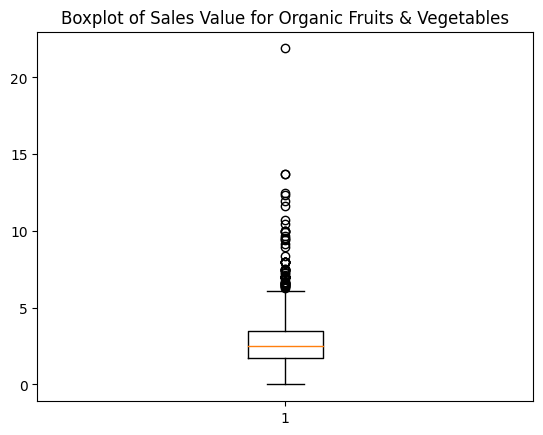

In [70]:
# Boxplot to check for outliers. We want to include outliers in the analysis as they are still relevant
data_organic = tran_demo_prod[tran_demo_prod['product_category']=='ORGANICS FRUIT & VEGETABLES']['sales_value']
plt.boxplot(data_organic)
plt.title('Boxplot of Sales Value for Organic Fruits & Vegetables')
plt.show()

In [71]:
# Aggregate the total sales for organic fruit & vegetables across all age groups
organic_sales_allage = organic_products.groupby('age')['sales_value'].sum()
organic_sales_allage

age
19-24     170.85
25-34    1329.04
35-44    1983.39
45-54    2588.72
55-64     461.66
65+       445.30
Name: sales_value, dtype: float64

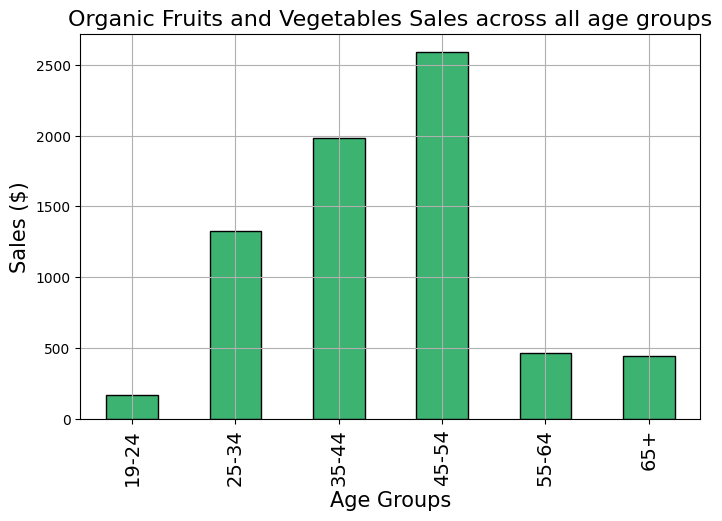

In [72]:
# Plotting bar chart of the total sales for organic fruit & vegetables across all age groups
plt.figure(figsize=(8,5))
plt.title("Organic Fruits and Vegetables Sales across all age groups",fontsize=16)
organic_sales_allage.plot(kind='bar', color='#3CB371',edgecolor='k')
plt.xlabel("Age Groups",fontsize=15)
plt.ylabel("Sales ($)",fontsize=15)
plt.xticks(fontsize=14)
plt.xticks(fontsize=14)
plt.grid(True)
plt.show()

In [73]:
# Locate the 'FITNESS&DIET' values under 'product_category'
wellness_products = tran_demo_prod[tran_demo_prod['product_category']=='FITNESS&DIET']

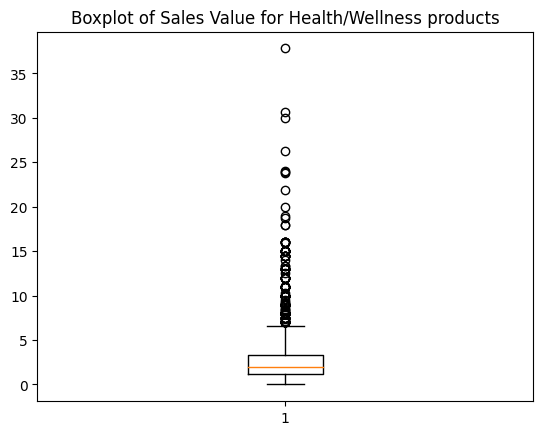

In [74]:
# Boxplot to check for outliers. We want to include outliers in the analysis as they are still relevant
data_wellness = tran_demo_prod[tran_demo_prod['product_category']=='FITNESS&DIET']['sales_value']
plt.boxplot(data_wellness)
plt.title('Boxplot of Sales Value for Health/Wellness products')
plt.show()

In [75]:
# Aggregate the total sales for fitness and diet products across all age groups
wellness_sales_allage = wellness_products.groupby('age')['sales_value'].sum()
wellness_sales_allage

age
19-24      63.41
25-34     829.82
35-44    1118.57
45-54    1461.14
55-64      62.93
65+        86.20
Name: sales_value, dtype: float64

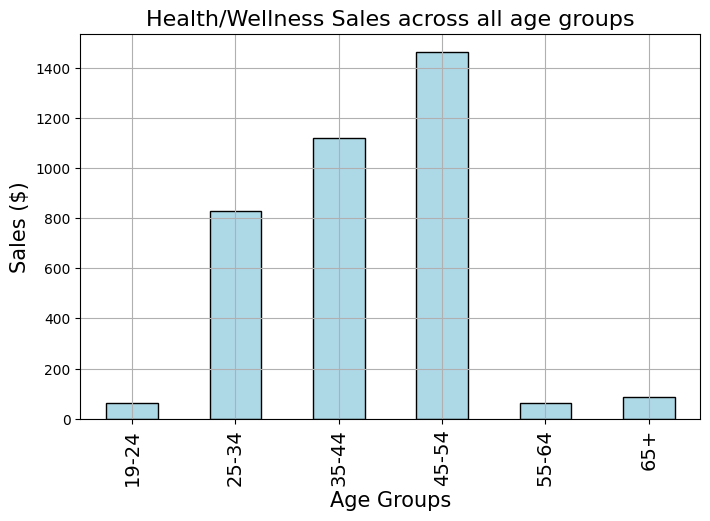

In [76]:
# Plotting bar chart of the total sales for fitness and diet products across all age groups
plt.figure(figsize=(8,5))
plt.title("Health/Wellness Sales across all age groups",fontsize=16)
wellness_sales_allage.plot(kind='bar', color='#ADD8E6',edgecolor='k')
plt.xlabel("Age Groups",fontsize=15)
plt.ylabel("Sales ($)",fontsize=15)
plt.xticks(fontsize=14)
plt.xticks(fontsize=14)
plt.grid(True)
plt.show()

In [77]:
# Locate the 'VITAMINS' values under 'product_category'
vitamin_products = tran_demo_prod[tran_demo_prod['product_category']=='VITAMINS']

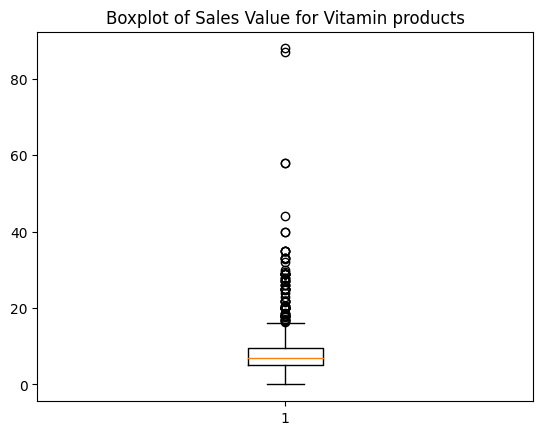

In [78]:
# Boxplot to check for outliers. We want to include outliers in the analysis as they are still relevant
data_vitamin = tran_demo_prod[tran_demo_prod['product_category']=='VITAMINS']['sales_value']
plt.boxplot(data_vitamin)
plt.title('Boxplot of Sales Value for Vitamin products')
plt.show()

In [79]:
# Aggregate the total sales for vitamin products across all age groups
vitamin_sales_allage = vitamin_products.groupby('age')['sales_value'].sum()
vitamin_sales_allage

age
19-24     144.05
25-34     801.92
35-44    1201.17
45-54    3162.12
55-64     945.14
65+       976.81
Name: sales_value, dtype: float64

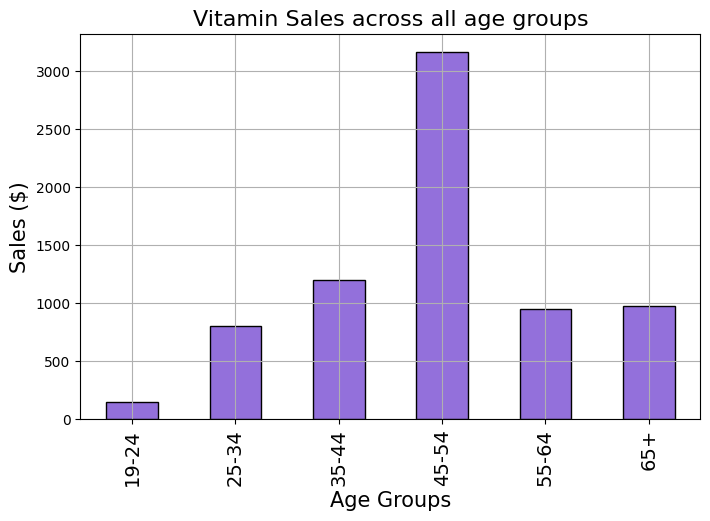

In [80]:
# Plotting bar chart of the total sales for vitamin products across all age groups
plt.figure(figsize=(8,5))
plt.title("Vitamin Sales across all age groups",fontsize=16)
vitamin_sales_allage.plot(kind='bar', color='#9370DB',edgecolor='k')
plt.xlabel("Age Groups",fontsize=15)
plt.ylabel("Sales ($)",fontsize=15)
plt.xticks(fontsize=14)
plt.xticks(fontsize=14)
plt.grid(True)
plt.show()

## Summary
(i) In summary, our 55+ age demographic is lacking revenue in specific health-related product categories

(ii) Methodology Employed
Data from transactions, demographics, and products were merged and analyzed. The total sales for health-related products for the demographic aged 55 and above were calculated and visualized in bar charts.

(iii) Interesting Insights
The 55+ age demographic has significantly less revenue than other age demographics for health-related products. This indicates a potential growth opportunity in this demographic.

Despite the need for health-related products in the 55+ demographic, they are not purchasing these products from our stores. This suggests that there may be barriers to access or other factors influencing their purchasing decisions.

(iv) Implications to the consumers. Proposed Solution
Targeted advertising, coupons, and senior citizen discounts are proposed solutions to increase sales in this demographic. These strategies could potentially drive an increase in revenue from this demographic.

(v) Limitations of our application
The limitations of our analysis only include our company’s sales data. We are lacking the overall market data for these specific products. 

Our market share is unknown, but we do know it is low. 
